<a href="https://colab.research.google.com/github/alamwasim/microstructure-alignment/blob/master/microstructure_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import urllib.request

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
PATH_OF_DATA= """/content/gdrive/'My Drive'/'ML microstructure alignment'/"""
!ls {PATH_OF_DATA}

26.jpg	27.jpg


In [4]:
!cp '/content/gdrive/My Drive/ML microstructure alignment/26.jpg' "26.jpg"
!cp '/content/gdrive/My Drive/ML microstructure alignment/27.jpg' "27.jpg"

In [5]:
img26 = cv2.imread('26.jpg',0)
img27 = cv2.imread('27.jpg',0)

In [6]:
img26.shape, img27.shape

((1536, 2048), (1536, 2048))

In [ ]:
cv2_imshow(img26)

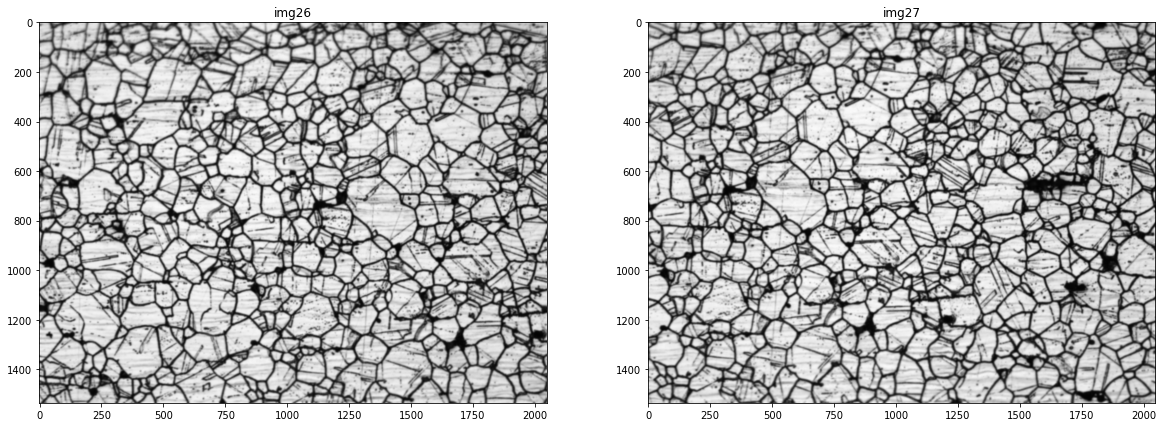

In [8]:
# Show the image with cv2_imshow
# cv2_imshow(img26)
#Show the image with matplotlib
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
fig, (ax1, ax2,) = plt.subplots(figsize=(20, 20), ncols=2)
ax1.imshow(img26, cmap = 'gray', interpolation = 'bicubic')
ax2.imshow(img27, cmap = 'gray', interpolation = 'bicubic')
ax1.title.set_text('img26')
ax2.title.set_text('img27')
plt.show()

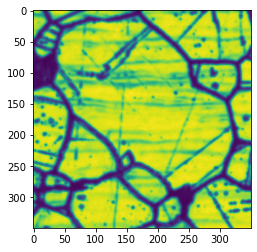

In [9]:
ax,ay=400,550
a=img27[ay:ay+350,ax:ax+350]
plt.imshow(a)

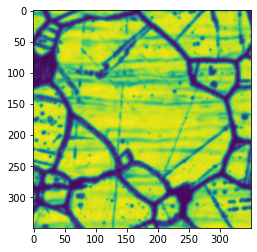

In [10]:
bx,by=1205,613
b=img26[by:by+350,bx:bx+350]
plt.imshow(b)

cv2.TM_CCOEFF
(1203, 611) (1553, 961)


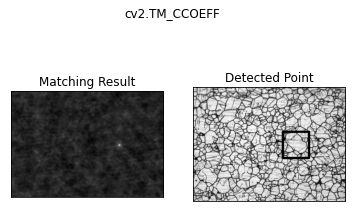

cv2.TM_CCOEFF_NORMED
(1203, 611) (1553, 961)


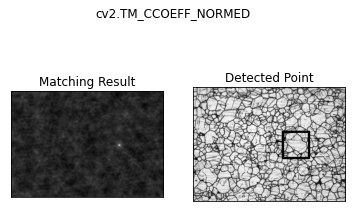

cv2.TM_CCORR
(1203, 611) (1553, 961)


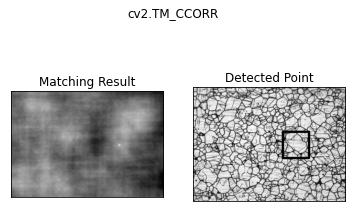

cv2.TM_CCORR_NORMED
(1203, 611) (1553, 961)


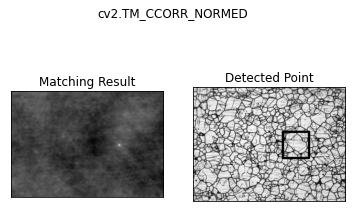

cv2.TM_SQDIFF
(1203, 611) (1553, 961)


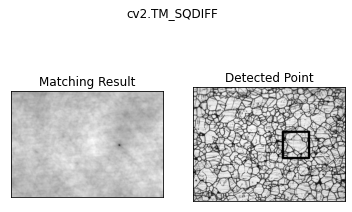

cv2.TM_SQDIFF_NORMED
(1203, 611) (1553, 961)


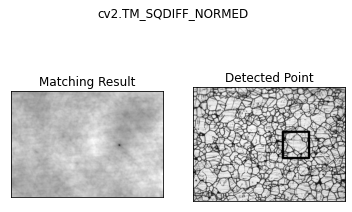

In [11]:
img = img26.copy()
img2 = img.copy()
template = a
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    print(meth)
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    print(top_left,bottom_right)

    cv2.rectangle( img,top_left, bottom_right, 0, 30)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [12]:
print("selective cropped coordinate in img27",(ax,ay),".Selective cropped Matched coordinate in  img26",top_left )
dx,dy=top_left[0]-ax,top_left[1]-ay
print("img26-img27 distance","dx:",dx,"dy:",dy)

selective cropped coordinate in img27 (400, 550) .Selective cropped Matched coordinate in  img26 (1203, 611)
img26-img27 distance dx: 803 dy: 61


In [13]:
def template_matching(img, template,method):
  h, w = template.shape[::-1]
  meth = eval(method)
  img=img.copy()

  # Apply template Matching
  res = cv2.matchTemplate(img,template,meth)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  
  # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + h, top_left[1] + w)
  print("top_left and bottom_right",top_left,bottom_right)
  print("min_val and max_val",min_val,max_val)
  
  cv2.rectangle( img,top_left, bottom_right, 0, 30)
  
  plt.subplot(141),plt.imshow(template,cmap = 'gray')
  plt.title('Template'), plt.xticks([]), plt.yticks([])
  plt.subplot(142),plt.imshow(img,cmap = 'gray')
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.subplot(143),plt.imshow(img[top_left[1]:top_left[1]+w,top_left[0]:top_left[0]+h],cmap = 'gray')
  plt.title('Detected Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(144),plt.imshow(res,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.show()
  return top_left,min_val,max_val

******************** Kernel Centre Point (250, 250) Kernel top left corner  [0, 0] ********************


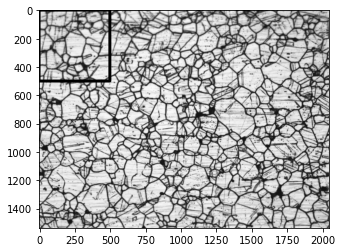

top_left and bottom_right (1176, 149) (1676, 649)
min_val and max_val -0.12525683641433716 0.12154299765825272


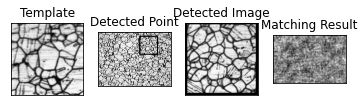

******************** Kernel Centre Point (250, 750) Kernel top left corner  [0, 500] ********************


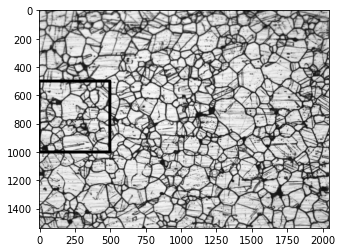

top_left and bottom_right (501, 700) (1001, 1200)
min_val and max_val -0.10560441017150879 0.11328061670064926


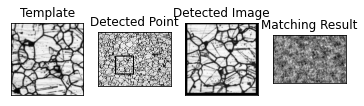

******************** Kernel Centre Point (250, 1250) Kernel top left corner  [0, 1000] ********************


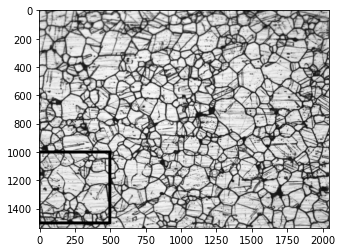

top_left and bottom_right (467, 196) (967, 696)
min_val and max_val -0.1074606254696846 0.13585609197616577


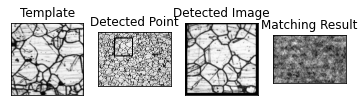

******************** Kernel Centre Point (750, 250) Kernel top left corner  [500, 0] ********************


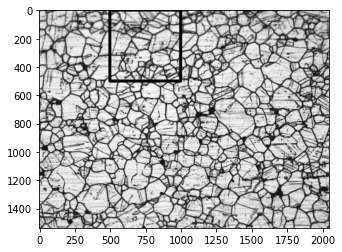

top_left and bottom_right (1447, 525) (1947, 1025)
min_val and max_val -0.11782021075487137 0.13619527220726013


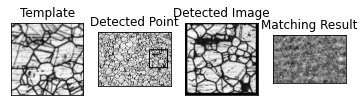

******************** Kernel Centre Point (750, 750) Kernel top left corner  [500, 500] ********************


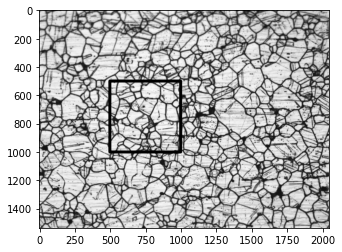

top_left and bottom_right (1067, 260) (1567, 760)
min_val and max_val -0.09588483721017838 0.10434006154537201


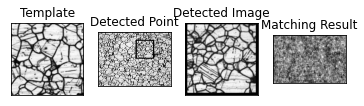

******************** Kernel Centre Point (750, 1250) Kernel top left corner  [500, 1000] ********************


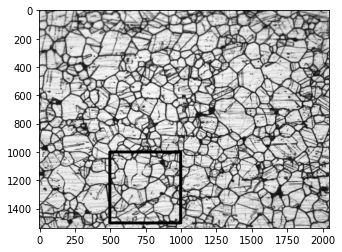

top_left and bottom_right (1231, 605) (1731, 1105)
min_val and max_val -0.10233477503061295 0.11046521365642548


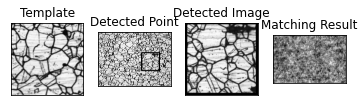

******************** Kernel Centre Point (1250, 250) Kernel top left corner  [1000, 0] ********************


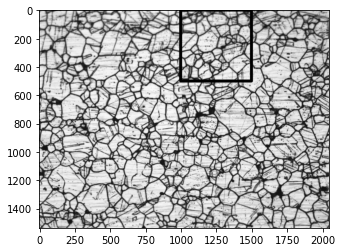

top_left and bottom_right (1288, 423) (1788, 923)
min_val and max_val -0.12178215384483337 0.1163470596075058


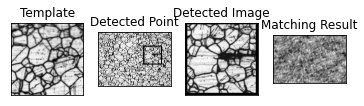

******************** Kernel Centre Point (1250, 750) Kernel top left corner  [1000, 500] ********************


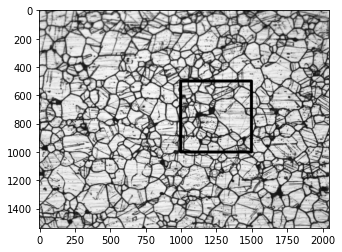

top_left and bottom_right (196, 439) (696, 939)
min_val and max_val -0.11346422880887985 0.9891778826713562


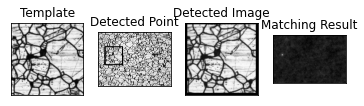

******************** Kernel Centre Point (1250, 1250) Kernel top left corner  [1000, 1000] ********************


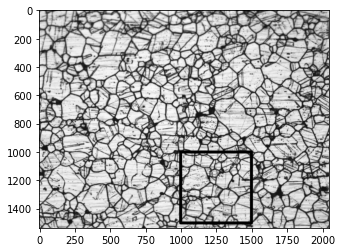

top_left and bottom_right (196, 940) (696, 1440)
min_val and max_val -0.10690727829933167 0.9921801090240479


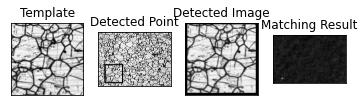

******************** Kernel Centre Point (1750, 250) Kernel top left corner  [1500, 0] ********************


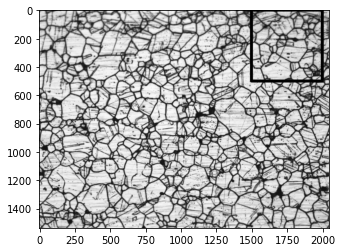

top_left and bottom_right (1136, 372) (1636, 872)
min_val and max_val -0.14298491179943085 0.14352595806121826


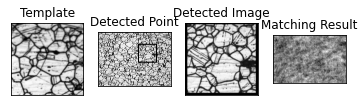

******************** Kernel Centre Point (1750, 750) Kernel top left corner  [1500, 500] ********************


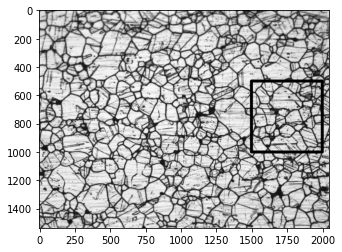

top_left and bottom_right (697, 439) (1197, 939)
min_val and max_val -0.09554664045572281 0.9923070669174194


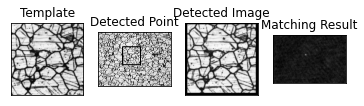

******************** Kernel Centre Point (1750, 1250) Kernel top left corner  [1500, 1000] ********************


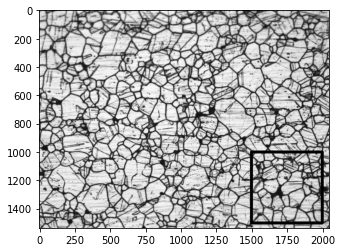

top_left and bottom_right (696, 939) (1196, 1439)
min_val and max_val -0.10328985750675201 0.9948450922966003


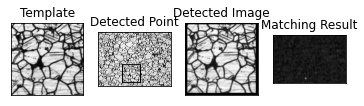



Max Value for lable got 0.9948450922966003 (1750, 1250, [1500, 1000])
dx [-804, -803, -804]
dy [-60, -61, -61]
Template have to be move by (-803.6666666666666, -60.666666666666664)


In [37]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
kernel=500
stride=500
threshold=0.99
template_img=img26.copy()
img=img27.copy()
MAX=0
MAX_LABLE=0
dx=[]
dy=[]
for i in range(kernel//2,img.shape[1],stride):
  for j in range(kernel//2,img.shape[0],stride):
    img2=template_img.copy()
    top_left=[i-kernel//2,j-kernel//2]
    bottom_right=[top_left[0]+kernel,top_left[1]+kernel]
    if(bottom_right[0]>=template_img.shape[1]):
      bottom_right[0]=template_img.shape[1]-1
    if (bottom_right[1]>=template_img.shape[0]):
        bottom_right[1]=template_img.shape[0]-1
    print("*"*20,"Kernel Centre Point",(i,j),"Kernel top left corner ",top_left,"*"*20)
    cv2.rectangle( img2,tuple(top_left), tuple(bottom_right), 0, 20)
    plt.imshow(img2,cmap = 'gray')
    plt.show()
    template=template_img[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
    matched_top_left,min_val,max_val=template_matching(img,template,methods[1])
    if(max_val>threshold):
      dx.append(matched_top_left[0]-top_left[0])
      dy.append(matched_top_left[1]-top_left[1])

    if(max_val>MAX):
      MAX=max_val
      MAX_LABLE=(i,j,top_left)
print("\n\nMax Value for lable got",MAX,MAX_LABLE)
print("dx",dx)
print("dy",dy)
dx,dy=np.mean(dx),np.mean(dy)
print("Template have to be move by",(dx,dy))

       



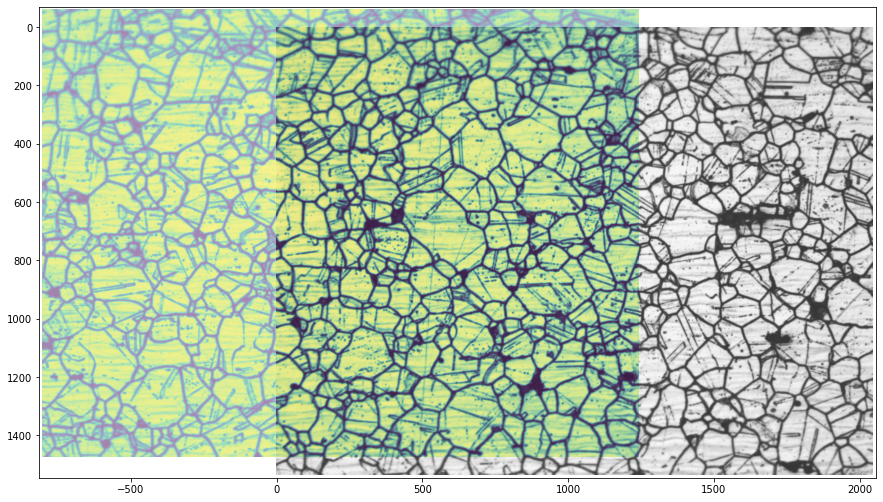

In [54]:
fig = plt.gcf()
ax = fig.gca()
ax.imshow(img,cmap='gray',alpha=0.8)
nrows,ncols=template_img.shape
ax.imshow(template_img,alpha=0.5,extent=[dx,ncols+dx,nrows+dy,dy])
ax.set_xlim(dx-10,img.shape[1]+10)
ax.set_ylim(img.shape[0]+10,dy-10)
fig.set_size_inches(15,10)

In [55]:
 fig.savefig("aligned.png")

In [ ]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()